 <h1 style="color:blue;"> Scenario 8 notebook</h1>

- C1S8.Py01	Create a ratio of balance of revolving accounts to total credit line
- C1S8.Py02	Create a revolving balance to income ratio
- C1S8.Py03	Multiple Regression with all features 
- C1S8.Py04	Calculating VIF for features in a model!

In [6]:
#Code Block 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#style options 

%matplotlib inline  
#if you want graphs to automatically without plt.show

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

plt.style.use('seaborn-v0_8') #a style that can be used for plots - see style reference above



In [7]:
#Code Block 2
df = pd.read_csv('data/Scenario8.csv', index_col = 0, header=0) 
    #DOES set the first column to the index
    # and the top row as the headers

In [8]:
#Code Block 3
df.head(3)

Member ID  Loan ID Origination Date  Interest Rate  Amount Funded  \
6     735990   789789          2/17/19           7.62           7500   
8     778284   746115         12/13/18           6.03          10000   
4     603349   885844         11/17/19          16.29          15000   

   Total Debt  Annual Income  Revolving Accounts  Total Revolving Credit Line  \
6    265809.0          92000              6419.0                      43000.0   
8    152402.0         108000              4653.0                      46100.0   
4    227890.0          72000             11702.0                      26300.0   

   Term Grade     Employee Title  Length of Employment Home Ownership  \
6    36     A            TD Bank                   4.0       MORTGAGE   
8    36     A  FlightStats, Inc.                   1.0       MORTGAGE   
4    36     C                NaN                   NaN       MORTGAGE   

  Income Verification      Loan Purpose Zip Code of Residence  \
6                 NaN       credit_card                 030xx   
8                 NaN  home_improvement                 750xx   
4            Verified             house                 341xx   

  State of Residence  Delinquencies Past 24 Months  \
6                 NH                           NaN   
8                 TX                           NaN   
4                 FL                           NaN   

   Credit Inquires Last 6 Months  Open Accounts  TermNum TermString  Day  \
6                              2              5       37  36 months    6   
8                              0             10       37  36 months    3   
4                              1             18       37  36 months    6   

   Month  Year  Loan_Income  Debt_Income  
6      2  2019     0.081522     2.889228  
8     12  2018     0.092593     1.411130  
4     11  2019     0.208333     3.165139

In [9]:
#Code Block 4
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      30071 non-null  int64  
 1   Loan ID                        30071 non-null  int64  
 2   Origination Date               30071 non-null  object 
 3   Interest Rate                  30071 non-null  float64
 4   Amount Funded                  30071 non-null  int64  
 5   Total Debt                     30071 non-null  float64
 6   Annual Income                  30071 non-null  int64  
 7   Revolving Accounts             29983 non-null  float64
 8   Total Revolving Credit Line    30059 non-null  float64
 9   Term                           30071 non-null  int64  
 10  Grade                          30071 non-null  object 
 11  Employee Title                 28396 non-null  object 
 12  Length of Employment           28990 non-null  floa

<h2 style="color:blue;">C1.S8.Py01 - Create a ratio of balance of revolving accounts to total credit line</h2>

- Revolving Accounts - Total credit revolving balance
- Total Revolving Credit Line - Total revolving high credit/credit limit

### What do you do with the null values?


In [11]:
#Code Block 5
df[df['Total Revolving Credit Line'].isnull()]

Member ID  Loan ID Origination Date  Interest Rate  Amount Funded  \
14535    2158534   781633          1/28/19          20.49          12800   
15910    2425033   701939          10/1/18          18.49           7000   
16999    2558452   603302           1/3/18          18.49          23500   
17345    2636799   651200          4/22/18          17.77           1300   
19769    2830591   869419         10/16/19          13.11           1000   
20657    2842803   826981          6/16/19          11.14          10000   
22896    3417839   668300          6/18/18           7.90           2175   
13514    1988048   858194          9/23/19          23.28          18000   
3321     1775967   699598          9/27/18          17.77           2700   
14229    2127469   625685           2/1/18          21.00          20050   
14488    2157879   870756         10/20/19          12.12           8000   
22796    3411294   672806           7/2/18          13.11          19500   

       Total Debt  Annual Income  Revolving Accounts  \
14535    150515.0          56000                 NaN   
15910    188625.0          90000                 NaN   
16999    774459.0         118000                 NaN   
17345     63969.0          40000                 NaN   
19769    172548.0         115000                 NaN   
20657    189997.0          55000                 NaN   
22896     80756.0          89000                 NaN   
13514     22921.0          42000                 NaN   
3321       3784.0          10000                 NaN   
14229     27816.0         117000                 NaN   
14488     33893.0          49000                 NaN   
22796      7618.0          75000                 NaN   

       Total Revolving Credit Line  Term Grade              Employee Title  \
14535                          NaN    60     E           Acme Trading Co.    
15910                          NaN    36     D        Aging Services of MN   
16999                          NaN    36     D                         PPD   
17345                          NaN    36     D                     Comcast   
19769                          NaN    36     B                       ksla    
20657                          NaN    36     B  Jackalope Ranch Restaurant   
22896                          NaN    36     A    Denton Police Department   
13514                          NaN    60     F      Health & Hospital Corp   
3321                           NaN    36     D                         DCM   
14229                          NaN    36     E    ADVANTAGE SEPTIC SERVICE   
14488                          NaN    36     B   Federal Bureau of Prisons   
22796                          NaN    36     B   Trucks and Parts of Tampa   

       Length of Employment Home Ownership Income Verification  \
14535                  10.0       MORTGAGE            Verified   
15910                   4.0       MORTGAGE            Verified   
16999                   6.0       MORTGAGE            Verified   
17345                   5.0       MORTGAGE                 NaN   
19769                   4.0       MORTGAGE     Source Verified   
20657                   4.0       MORTGAGE     Source Verified   
22896                  10.0       MORTGAGE                 NaN   
13514                  10.0            OWN            Verified   
3321                    1.0           RENT            Verified   
14229                  10.0           RENT            Verified   
14488                   3.0           RENT                 NaN   
22796                   1.0           RENT            Verified   

             Loan Purpose Zip Code of Residence State of Residence  \
14535               other                 306xx                 GA   
15910    home_improvement                 553xx                 MN   
16999      small_business                 967xx                 HI   
17345            vacation                 155xx                 PA   
19769            vacation                 711xx                 L

### Are their any credit lines that are == 0?

In [14]:
#Code Block 6
df[df['Total Revolving Credit Line']==0]

Empty DataFrame
Columns: [Member ID, Loan ID, Origination Date, Interest Rate, Amount Funded, Total Debt, Annual Income, Revolving Accounts, Total Revolving Credit Line, Term, Grade, Employee Title, Length of Employment, Home Ownership, Income Verification, Loan Purpose, Zip Code of Residence, State of Residence, Delinquencies Past 24 Months, Credit Inquires Last 6 Months, Open Accounts, TermNum, TermString, Day, Month, Year, Loan_Income, Debt_Income]
Index: []

In [20]:
#Code Block 7
df['RevBal_Line'] = df['Revolving Accounts'] / df['Total Revolving Credit Line'] 

In [22]:
#Code Block 8
df[['Revolving Accounts', 'Total Revolving Credit Line', 'RevBal_Line']].describe()

Revolving Accounts  Total Revolving Credit Line   RevBal_Line
count        2.998300e+04                 3.005900e+04  29983.000000
mean         1.685330e+04                 2.987683e+04      0.595542
std          2.107094e+04                 3.007873e+04      0.227870
min          4.000000e+00                 1.000000e+02      0.000218
25%          7.438000e+03                 1.410000e+04      0.439488
50%          1.287600e+04                 2.320000e+04      0.620545
75%          2.152350e+04                 3.724550e+04      0.776866
max          1.743266e+06                 2.013133e+06      2.391873

In [24]:
#Code Block 9
round(df[['Revolving Accounts', 'Total Revolving Credit Line', 'RevBal_Line']].describe(), 2)

Revolving Accounts  Total Revolving Credit Line  RevBal_Line
count            29983.00                     30059.00     29983.00
mean             16853.30                     29876.83         0.60
std              21070.94                     30078.73         0.23
min                  4.00                       100.00         0.00
25%               7438.00                     14100.00         0.44
50%              12876.00                     23200.00         0.62
75%              21523.50                     37245.50         0.78
max            1743266.00                   2013133.00         2.39

In [26]:
#Code Block 10
df[['Revolving Accounts', 'Total Revolving Credit Line', 
    'RevBal_Line']].sort_values(by='RevBal_Line', ascending = False).head(10)

Revolving Accounts  Total Revolving Credit Line  RevBal_Line
2495              63863.0                      26700.0     2.391873
22950             21308.0                      18700.0     1.139465
313                2752.0                       2500.0     1.100800
24763             14053.0                      13400.0     1.048731
20721             43242.0                      41400.0     1.044493
21320             52091.0                      49900.0     1.043908
21977             10373.0                      10100.0     1.027030
19181             23711.0                      23300.0     1.017639
20126             18558.0                      18400.0     1.008587
20467              8369.0                       8300.0     1.008313

In [28]:
#Code Block 11
df[['Revolving Accounts', 'Total Revolving Credit Line', 
    'RevBal_Line']].sort_values(by='RevBal_Line', ascending = True).head(5)

Revolving Accounts  Total Revolving Credit Line  RevBal_Line
21927                 5.0                      22900.0     0.000218
30031                10.0                      43800.0     0.000228
17432                 8.0                      20300.0     0.000394
3590                 37.0                      69400.0     0.000533
12378                42.0                      77000.0     0.000545

### How to use .iloc (integer location)
https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [31]:
#Code Block 12
df.iloc[:, 0:9].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Member ID                    30071 non-null  int64  
 1   Loan ID                      30071 non-null  int64  
 2   Origination Date             30071 non-null  object 
 3   Interest Rate                30071 non-null  float64
 4   Amount Funded                30071 non-null  int64  
 5   Total Debt                   30071 non-null  float64
 6   Annual Income                30071 non-null  int64  
 7   Revolving Accounts           29983 non-null  float64
 8   Total Revolving Credit Line  30059 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.3+ MB


In [33]:
#Code Block 13
df[['Revolving Accounts', 'Total Revolving Credit Line']] = df[['Revolving Accounts', 'Total Revolving Credit Line']].fillna(0)
df.iloc[:, 0:9].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Member ID                    30071 non-null  int64  
 1   Loan ID                      30071 non-null  int64  
 2   Origination Date             30071 non-null  object 
 3   Interest Rate                30071 non-null  float64
 4   Amount Funded                30071 non-null  int64  
 5   Total Debt                   30071 non-null  float64
 6   Annual Income                30071 non-null  int64  
 7   Revolving Accounts           30071 non-null  float64
 8   Total Revolving Credit Line  30071 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.3+ MB


In [35]:
#Code Block 14
df[df['Total Revolving Credit Line']==0].head()

Member ID  Loan ID Origination Date  Interest Rate  Amount Funded  \
14535    2158534   781633          1/28/19          20.49          12800   
15910    2425033   701939          10/1/18          18.49           7000   
16999    2558452   603302           1/3/18          18.49          23500   
17345    2636799   651200          4/22/18          17.77           1300   
19769    2830591   869419         10/16/19          13.11           1000   

       Total Debt  Annual Income  Revolving Accounts  \
14535    150515.0          56000                 0.0   
15910    188625.0          90000                 0.0   
16999    774459.0         118000                 0.0   
17345     63969.0          40000                 0.0   
19769    172548.0         115000                 0.0   

       Total Revolving Credit Line  Term Grade        Employee Title  \
14535                          0.0    60     E     Acme Trading Co.    
15910                          0.0    36     D  Aging Services of MN   
16999                          0.0    36     D                   PPD   
17345                          0.0    36     D               Comcast   
19769                          0.0    36     B                 ksla    

       Length of Employment Home Ownership Income Verification  \
14535                  10.0       MORTGAGE            Verified   
15910                   4.0       MORTGAGE            Verified   
16999                   6.0       MORTGAGE            Verified   
17345                   5.0       MORTGAGE                 NaN   
19769                   4.0       MORTGAGE     Source Verified   

           Loan Purpose Zip Code of Residence State of Residence  \
14535             other                 306xx                 GA   
15910  home_improvement                 553xx                 MN   
16999    small_business                 967xx                 HI   
17345          vacation                 155xx                 PA   
19769          vacation                 711xx                 LA   

       Delinquencies Past 24 Months  Credit Inquires Last 6 Months  \
14535                           NaN                              0   
15910                           2.0                              0   
16999                           NaN                              0   
17345                           NaN                              0   
19769                           NaN                              0   

       Open Accounts  TermNum TermString  Day  Month  Year  Loan_Income  \
14535              7       61  60 months    0      1  2019     0.228571   
15910              3       37  36 months    0     10  2018     0.077778   
16999              3       37  36 months    2      1  2018     0.199153   
17345              3       37  36 months    6      4  2018     0.032500   
19769              1       37  36 months    2     10  2019     0.008696   

       Debt_Income  RevBal_Line  
14535     2.687768          NaN  
15910     2.095833          NaN  
16999     6.563212          NaN  
17345     1.599225          NaN  
19769     1.500417          NaN

In [37]:
#Code Block 15
df['RevBal_Line'] = df['Revolving Accounts'] / df['Total Revolving Credit Line'] 
round(df[['Revolving Accounts', 'Total Revolving Credit Line', 'RevBal_Line']].describe(), 2)

Revolving Accounts  Total Revolving Credit Line  RevBal_Line
count            30071.00                     30071.00     30059.00
mean             16803.98                     29864.91         0.59
std              21059.78                     30078.65         0.23
min                  0.00                         0.00         0.00
25%               7390.00                     14100.00         0.44
50%              12841.00                     23120.00         0.62
75%              21485.00                     37200.00         0.78
max            1743266.00                   2013133.00         2.39

### For all ['Total Revolving Credit Line'] ==0, set the RevBal_Line to 0.

In [40]:
#Code Block 16
def revline(c):
  if c['Total Revolving Credit Line'] ==0:
    return 0
  else: 
    return c['Revolving Accounts'] / c['Total Revolving Credit Line'] 

df['RevBal_Line'] = df.apply(revline, axis=1)
round(df[['Revolving Accounts', 'Total Revolving Credit Line', 'RevBal_Line']].describe(), 2)

Revolving Accounts  Total Revolving Credit Line  RevBal_Line
count            30071.00                     30071.00     30071.00
mean             16803.98                     29864.91         0.59
std              21059.78                     30078.65         0.23
min                  0.00                         0.00         0.00
25%               7390.00                     14100.00         0.44
50%              12841.00                     23120.00         0.62
75%              21485.00                     37200.00         0.78
max            1743266.00                   2013133.00         2.39

In [42]:
#Code Block 17
df[df['Total Revolving Credit Line']==0].head()

Member ID  Loan ID Origination Date  Interest Rate  Amount Funded  \
14535    2158534   781633          1/28/19          20.49          12800   
15910    2425033   701939          10/1/18          18.49           7000   
16999    2558452   603302           1/3/18          18.49          23500   
17345    2636799   651200          4/22/18          17.77           1300   
19769    2830591   869419         10/16/19          13.11           1000   

       Total Debt  Annual Income  Revolving Accounts  \
14535    150515.0          56000                 0.0   
15910    188625.0          90000                 0.0   
16999    774459.0         118000                 0.0   
17345     63969.0          40000                 0.0   
19769    172548.0         115000                 0.0   

       Total Revolving Credit Line  Term Grade        Employee Title  \
14535                          0.0    60     E     Acme Trading Co.    
15910                          0.0    36     D  Aging Services of MN   
16999                          0.0    36     D                   PPD   
17345                          0.0    36     D               Comcast   
19769                          0.0    36     B                 ksla    

       Length of Employment Home Ownership Income Verification  \
14535                  10.0       MORTGAGE            Verified   
15910                   4.0       MORTGAGE            Verified   
16999                   6.0       MORTGAGE            Verified   
17345                   5.0       MORTGAGE                 NaN   
19769                   4.0       MORTGAGE     Source Verified   

           Loan Purpose Zip Code of Residence State of Residence  \
14535             other                 306xx                 GA   
15910  home_improvement                 553xx                 MN   
16999    small_business                 967xx                 HI   
17345          vacation                 155xx                 PA   
19769          vacation                 711xx                 LA   

       Delinquencies Past 24 Months  Credit Inquires Last 6 Months  \
14535                           NaN                              0   
15910                           2.0                              0   
16999                           NaN                              0   
17345                           NaN                              0   
19769                           NaN                              0   

       Open Accounts  TermNum TermString  Day  Month  Year  Loan_Income  \
14535              7       61  60 months    0      1  2019     0.228571   
15910              3       37  36 months    0     10  2018     0.077778   
16999              3       37  36 months    2      1  2018     0.199153   
17345              3       37  36 months    6      4  2018     0.032500   
19769              1       37  36 months    2     10  2019     0.008696   

       Debt_Income  RevBal_Line  
14535     2.687768          0.0  
15910     2.095833          0.0  
16999     6.563212          0.0  
17345     1.599225          0.0  
19769     1.500417          0.0

<h2 style="color:blue;">C1.S8.Py02 - Create a revolving balance to income ratio</h2>

### Creating a ratio assumptions to check:
- Are there any null values?  
    - Fill in null values 
    - Leave as is and new ratio will be null
- Are there any **zero (0)** values for the denominator?
    - Check the corresponding numerator, if all values for numerator are **zero (0)** then use a function and ratio == 0 when denominator and numerator == 0.
    - If the numerator is not zero (0), then based on the situation, you will have to make a judgment.

In [45]:
#Code Block 18
df.iloc[:, 0:9].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Member ID                    30071 non-null  int64  
 1   Loan ID                      30071 non-null  int64  
 2   Origination Date             30071 non-null  object 
 3   Interest Rate                30071 non-null  float64
 4   Amount Funded                30071 non-null  int64  
 5   Total Debt                   30071 non-null  float64
 6   Annual Income                30071 non-null  int64  
 7   Revolving Accounts           30071 non-null  float64
 8   Total Revolving Credit Line  30071 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.3+ MB


In [47]:
#Code Block 19
df[df['Annual Income']==0]

Empty DataFrame
Columns: [Member ID, Loan ID, Origination Date, Interest Rate, Amount Funded, Total Debt, Annual Income, Revolving Accounts, Total Revolving Credit Line, Term, Grade, Employee Title, Length of Employment, Home Ownership, Income Verification, Loan Purpose, Zip Code of Residence, State of Residence, Delinquencies Past 24 Months, Credit Inquires Last 6 Months, Open Accounts, TermNum, TermString, Day, Month, Year, Loan_Income, Debt_Income, RevBal_Line]
Index: []

In [49]:
#Code Block 20
df['RevBal_Income'] = df['Revolving Accounts'] / df['Annual Income'] 
round(df[['Revolving Accounts', 'Annual Income', 'RevBal_Income']].describe(), 2)

Revolving Accounts  Annual Income  RevBal_Income
count            30071.00       30071.00       30071.00
mean             16803.98       73783.15           0.25
std              21059.78       80128.46           0.19
min                  0.00        7200.00           0.00
25%               7390.00       45000.00           0.12
50%              12841.00       63000.00           0.21
75%              21485.00       88000.00           0.33
max            1743266.00     7141778.00           4.36

<h2 style="color:blue;">C1.S8.Py03 - Multiple Regression with all features</h2>

- Create X (2 options)
    - Create X using .iloc
    - Create X using label names

<h3 style="color:blue;">The last regression model included:</h3> 

- X = ['Amount Funded', 'Annual Income', 'Total Debt', 'Loan_Income', 'Debt_Income']
- y = ['Interest Rate']

<h3 style="color:blue;">This model will include:</h3> 

- X = ['Amount Funded', 'Annual Income', 'Total Debt', 'Revolving Accounts', 'Total Revolving Credit Line', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income']
- y = ['Interest Rate']

<h3 style="color:blue;">Create X with .iloc</h3> 

In [55]:
#Code Block 21
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      30071 non-null  int64  
 1   Loan ID                        30071 non-null  int64  
 2   Origination Date               30071 non-null  object 
 3   Interest Rate                  30071 non-null  float64
 4   Amount Funded                  30071 non-null  int64  
 5   Total Debt                     30071 non-null  float64
 6   Annual Income                  30071 non-null  int64  
 7   Revolving Accounts             30071 non-null  float64
 8   Total Revolving Credit Line    30071 non-null  float64
 9   Term                           30071 non-null  int64  
 10  Grade                          30071 non-null  object 
 11  Employee Title                 28396 non-null  object 
 12  Length of Employment           28990 non-null  floa

In [57]:
#Code Block 22

X = df.iloc[:, [4, 5, 6, 7, 8, 26, 27, 28, 29]]
display(X.head())

y = df[['Interest Rate']]
y.head()

Amount Funded  Total Debt  Annual Income  Revolving Accounts  \
6           7500    265809.0          92000              6419.0   
8          10000    152402.0         108000              4653.0   
4          15000    227890.0          72000             11702.0   
7          35000    354982.0         114000             38651.0   
9           3600    175788.0          65000             12936.0   

   Total Revolving Credit Line  Loan_Income  Debt_Income  RevBal_Line  \
6                      43000.0     0.081522     2.889228     0.149279   
8                      46100.0     0.092593     1.411130     0.100933   
4                      26300.0     0.208333     3.165139     0.444943   
7                      79800.0     0.307018     3.113877     0.484348   
9                      39400.0     0.055385     2.704431     0.328325   

   RevBal_Income  
6       0.069772  
8       0.043083  
4       0.162528  
7       0.339044  
9       0.199015

Interest Rate
6           7.62
8           6.03
4          16.29
7          21.49
9          11.14

In [59]:
#Code Block 23
df_reg = df[['Interest Rate', 'Amount Funded', 'Annual Income', 'Total Debt', 'Revolving Accounts', 'Total Revolving Credit Line', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income']]
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Interest Rate                30071 non-null  float64
 1   Amount Funded                30071 non-null  int64  
 2   Annual Income                30071 non-null  int64  
 3   Total Debt                   30071 non-null  float64
 4   Revolving Accounts           30071 non-null  float64
 5   Total Revolving Credit Line  30071 non-null  float64
 6   Loan_Income                  30071 non-null  float64
 7   Debt_Income                  30071 non-null  float64
 8   RevBal_Line                  30071 non-null  float64
 9   RevBal_Income                30071 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 2.5 MB


In [61]:
#Code Block 24
import statsmodels
import statsmodels.api as sm

In [63]:
#Code Block 25
X = sm.add_constant(X) # adding a constant

reg1 = sm.OLS(y, X).fit()

predictions1 = reg1.predict(X) 
resid1 = reg1.resid
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     1288.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:44:11   Log-Likelihood:                -80773.
No. Observations:               30071   AIC:                         1.616e+05
Df Residuals:                   30061   BIC:                         1.616e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           9.0295      0.096     93.787      0.000       8.841       9.218
Amount Funded                8.778e-05    4.3e-06     20.413      0.000    7.94e-05    9.62e-05
Total Debt                  -1.616e-06   2.86e-07     -5.654      0.000   -2.18e-06   -1.06e-06
Annual Income                -8.13e-07   3.24e-07     -2.513      0.012   -1.45e-06   -1.79e-07
Revolving Accounts           4.085e-05   2.65e-06     15.389      0.000    3.56e-05    4.61e-05
Total Revolving Credit Line -3.659e-05   1.83e-06    -19.961      0.000   -4.02e-05    -3.3e-05
Loan_Income                     7.0752      0.322     21.974      0.000       6.444       7.706
Debt_Income                    -0.1682      0.024     -7.040      0.000      -0.215      -0.121
RevBal_Line                     6.0316      0.133     45.243      0.000       5.770       6.293
RevBal_Income                  -2.5013      0.193    -12.954      0.000      -2.880      -2.123
==============================================================================
Omnibus:                      432.419   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.472
Skew:                           0.285   Prob(JB):                     1.37e-96
Kurtosis:                       2.835   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Create the predictions dataframe

In [72]:
#Code Block 26
df_predictions1 = pd.DataFrame(predictions1)
df_predictions1=df_predictions1.rename(columns = {0:'Int_Pred1'})
df_predictions1.head()

Int_Pred1
6   8.688819
8   8.995098
4  12.653717
7  13.815882
9   9.514643

### Create the residuals dataframe

In [75]:
#Code Block 27
df_resid1 = pd.DataFrame(resid1)
df_resid1=df_resid1.rename(columns = {0:'Resid1'})
df_resid1.head()

Resid1
6 -1.068819
8 -2.965098
4  3.636283
7  7.674118
9  1.625357

### Create DataFrame for Actual and its Predictions

In [78]:
#Code Block 27
df_reg_results = pd.concat([X, y, df_predictions1, df_resid1], axis=1)
df_reg_results.head()

const  Amount Funded  Total Debt  Annual Income  Revolving Accounts  \
6    1.0           7500    265809.0          92000              6419.0   
8    1.0          10000    152402.0         108000              4653.0   
4    1.0          15000    227890.0          72000             11702.0   
7    1.0          35000    354982.0         114000             38651.0   
9    1.0           3600    175788.0          65000             12936.0   

   Total Revolving Credit Line  Loan_Income  Debt_Income  RevBal_Line  \
6                      43000.0     0.081522     2.889228     0.149279   
8                      46100.0     0.092593     1.411130     0.100933   
4                      26300.0     0.208333     3.165139     0.444943   
7                      79800.0     0.307018     3.113877     0.484348   
9                      39400.0     0.055385     2.704431     0.328325   

   RevBal_Income  Interest Rate  Int_Pred1    Resid1  
6       0.069772           7.62   8.688819 -1.068819  
8       0.043083           6.03   8.995098 -2.965098  
4       0.162528          16.29  12.653717  3.636283  
7       0.339044          21.49  13.815882  7.674118  
9       0.199015          11.14   9.514643  1.625357

 <h3 style="color:blue;">Graphically looking at y and its residuals</h3>

https://seaborn.pydata.org/generated/seaborn.residplot.html

<Axes: xlabel='Int_Pred1', ylabel='Resid1'>

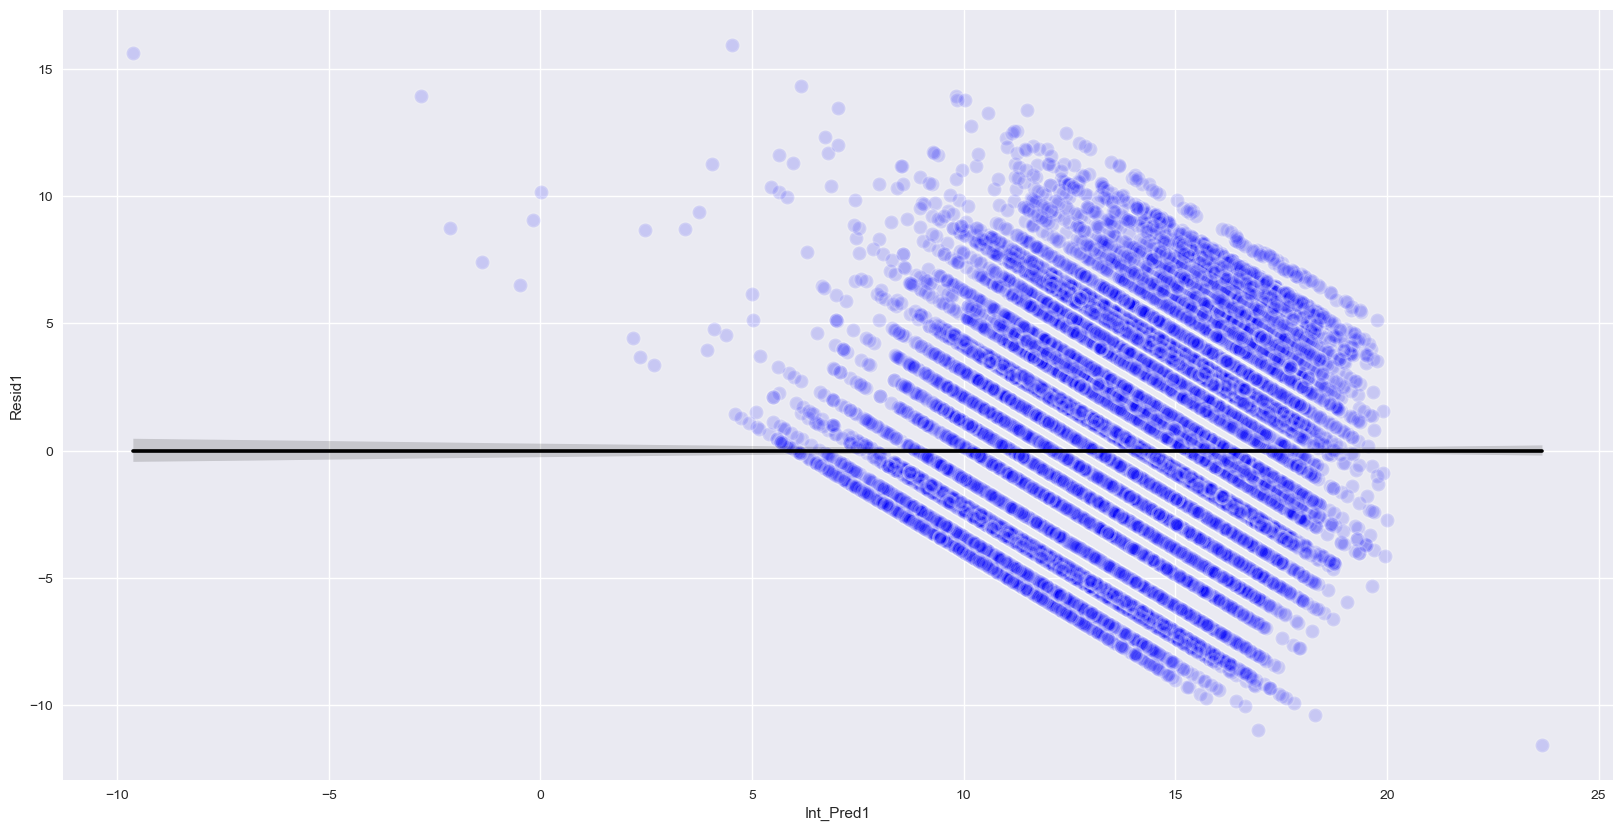

In [80]:
#Code Block 28
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred1', y='Resid1', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})


(-10.0, 15.0)

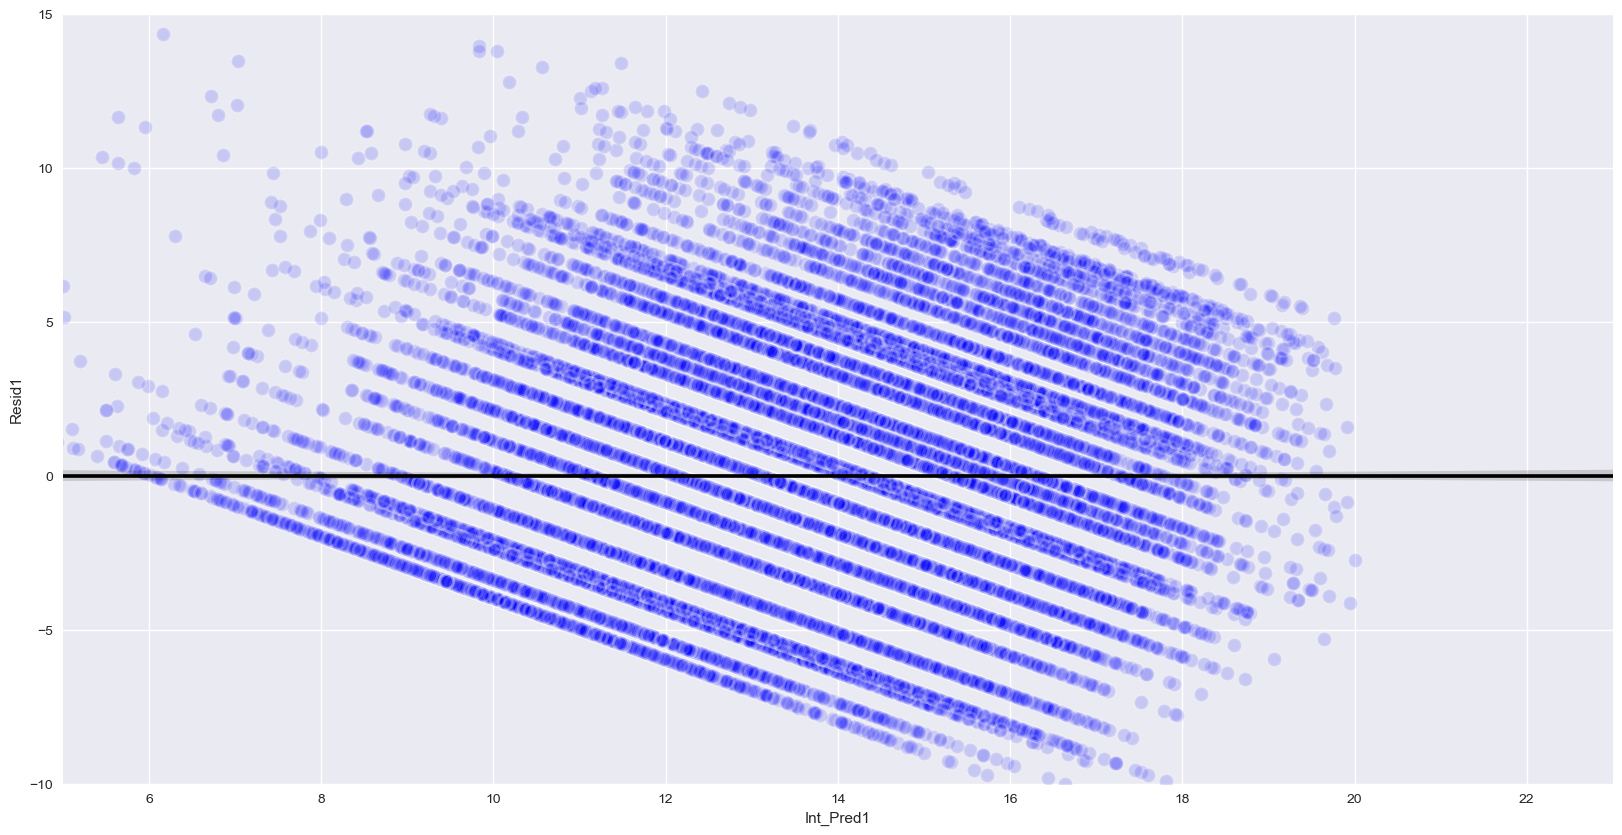

In [82]:
#Code Block 29
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred1', y='Resid1', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})
plt.xlim(5, 23)
plt.ylim(-10, 15)

In [84]:
#Code Block 30
display(df_reg_results.sort_values(by = 'Resid1').head())
df_reg_results.sort_values(by = 'Resid1', ascending=False).head()

const  Amount Funded  Total Debt  Annual Income  Revolving Accounts  \
2495     1.0           7200    229394.0          92000             63863.0   
28875    1.0          25000     56469.0          66000             18286.0   
12471    1.0          26000     54453.0         104000               913.0   
20437    1.0          22400    332500.0         118000             29577.0   
4764     1.0          23850    165809.0          60000              4857.0   

       Total Revolving Credit Line  Loan_Income  Debt_Income  RevBal_Line  \
2495                       26700.0     0.078261     2.493413     2.391873   
28875                      26000.0     0.378788     0.855591     0.703308   
12471                       1000.0     0.250000     0.523587     0.913000   
20437                      30100.0     0.189831     2.817797     0.982625   
4764                        6000.0     0.397500     2.763483     0.809500   

       RevBal_Income  Interest Rate  Int_Pred1     Resid1  
2495        0.694163          12.12  23.672358 -11.552358  
28875       0.277061           6.00  16.959743 -10.959743  
12471       0.008779           7.90  18.305566 -10.405566  
20437       0.250653           6.62  16.638130 -10.018130  
4764        0.080950           7.90  17.812759  -9.912759

const  Amount Funded  Total Debt  Annual Income  Revolving Accounts  \
4070     1.0          35000    862656.0         845000             51228.0   
2884     1.0          10000    427995.0         120000             28050.0   
811      1.0          10000     30168.0          30000             30168.0   
21292    1.0          35000   3471522.0         400000           1743266.0   
2852     1.0          10800    237043.0          60000              7801.0   

       Total Revolving Credit Line  Loan_Income  Debt_Income  RevBal_Line  \
4070                      241300.0     0.041420     1.020895     0.212300   
2884                      535610.0     0.083333     3.566625     0.052370   
811                       156900.0     0.333333     1.005600     0.192275   
21292                    2013133.0     0.087500     8.678805     0.865947   
2852                       40500.0     0.180000     3.950717     0.192617   

       RevBal_Income  Interest Rate  Int_Pred1     Resid1  
4070        0.060625          20.49   4.533670  15.956330  
2884        0.233750           6.03  -9.615004  15.645004  
811         1.005600          20.49   6.158605  14.331395  
21292       4.358165          11.14  -2.810321  13.950321  
2852        0.130017          23.76   9.827799  13.932201

In [86]:
#Code Block 31
display(df_reg_results.sort_values(by = 'Annual Income', ascending=False).head())

const  Amount Funded  Total Debt  Annual Income  Revolving Accounts  \
22304    1.0          14825     69548.0        7141778             11351.0   
29333    1.0          30000    329254.0        6100000             15219.0   
20416    1.0          35000   8000078.0        5000000            975800.0   
29607    1.0          35000   1528010.0        2000000            694615.0   
82       1.0          24000     49281.0        1500000             18544.0   

       Total Revolving Credit Line  Loan_Income  Debt_Income  RevBal_Line  \
22304                      16000.0     0.002076     0.009738     0.709438   
29333                      16100.0     0.004918     0.053976     0.945280   
20416                     988000.0     0.007000     1.600016     0.987652   
29607                     757500.0     0.017500     0.764005     0.916983   
82                         24000.0     0.016000     0.032854     0.772667   

       RevBal_Income  Interest Rate  Int_Pred1     Resid1  
22304       0.001589          13.11   8.578260   4.531740  
29333       0.002495          12.12  11.924927   0.195073  
20416       0.195160          15.31   4.064128  11.245872  
29607       0.347307          15.80  13.318370   2.481630  
82          0.012363          21.00  14.453488   6.546512

In [88]:
#Code Block 32
df_reg_results = pd.concat([df_reg_results, df['Home Ownership']], axis=1)
df_reg_results.head()                                 

const  Amount Funded  Total Debt  Annual Income  Revolving Accounts  \
6    1.0           7500    265809.0          92000              6419.0   
8    1.0          10000    152402.0         108000              4653.0   
4    1.0          15000    227890.0          72000             11702.0   
7    1.0          35000    354982.0         114000             38651.0   
9    1.0           3600    175788.0          65000             12936.0   

   Total Revolving Credit Line  Loan_Income  Debt_Income  RevBal_Line  \
6                      43000.0     0.081522     2.889228     0.149279   
8                      46100.0     0.092593     1.411130     0.100933   
4                      26300.0     0.208333     3.165139     0.444943   
7                      79800.0     0.307018     3.113877     0.484348   
9                      39400.0     0.055385     2.704431     0.328325   

   RevBal_Income  Interest Rate  Int_Pred1    Resid1 Home Ownership  
6       0.069772           7.62   8.688819 -1.068819       MORTGAGE  
8       0.043083           6.03   8.995098 -2.965098       MORTGAGE  
4       0.162528          16.29  12.653717  3.636283       MORTGAGE  
7       0.339044          21.49  13.815882  7.674118       MORTGAGE  
9       0.199015          11.14   9.514643  1.625357       MORTGAGE

(-10.0, 15.0)

<Figure size 2000x1000 with 0 Axes>

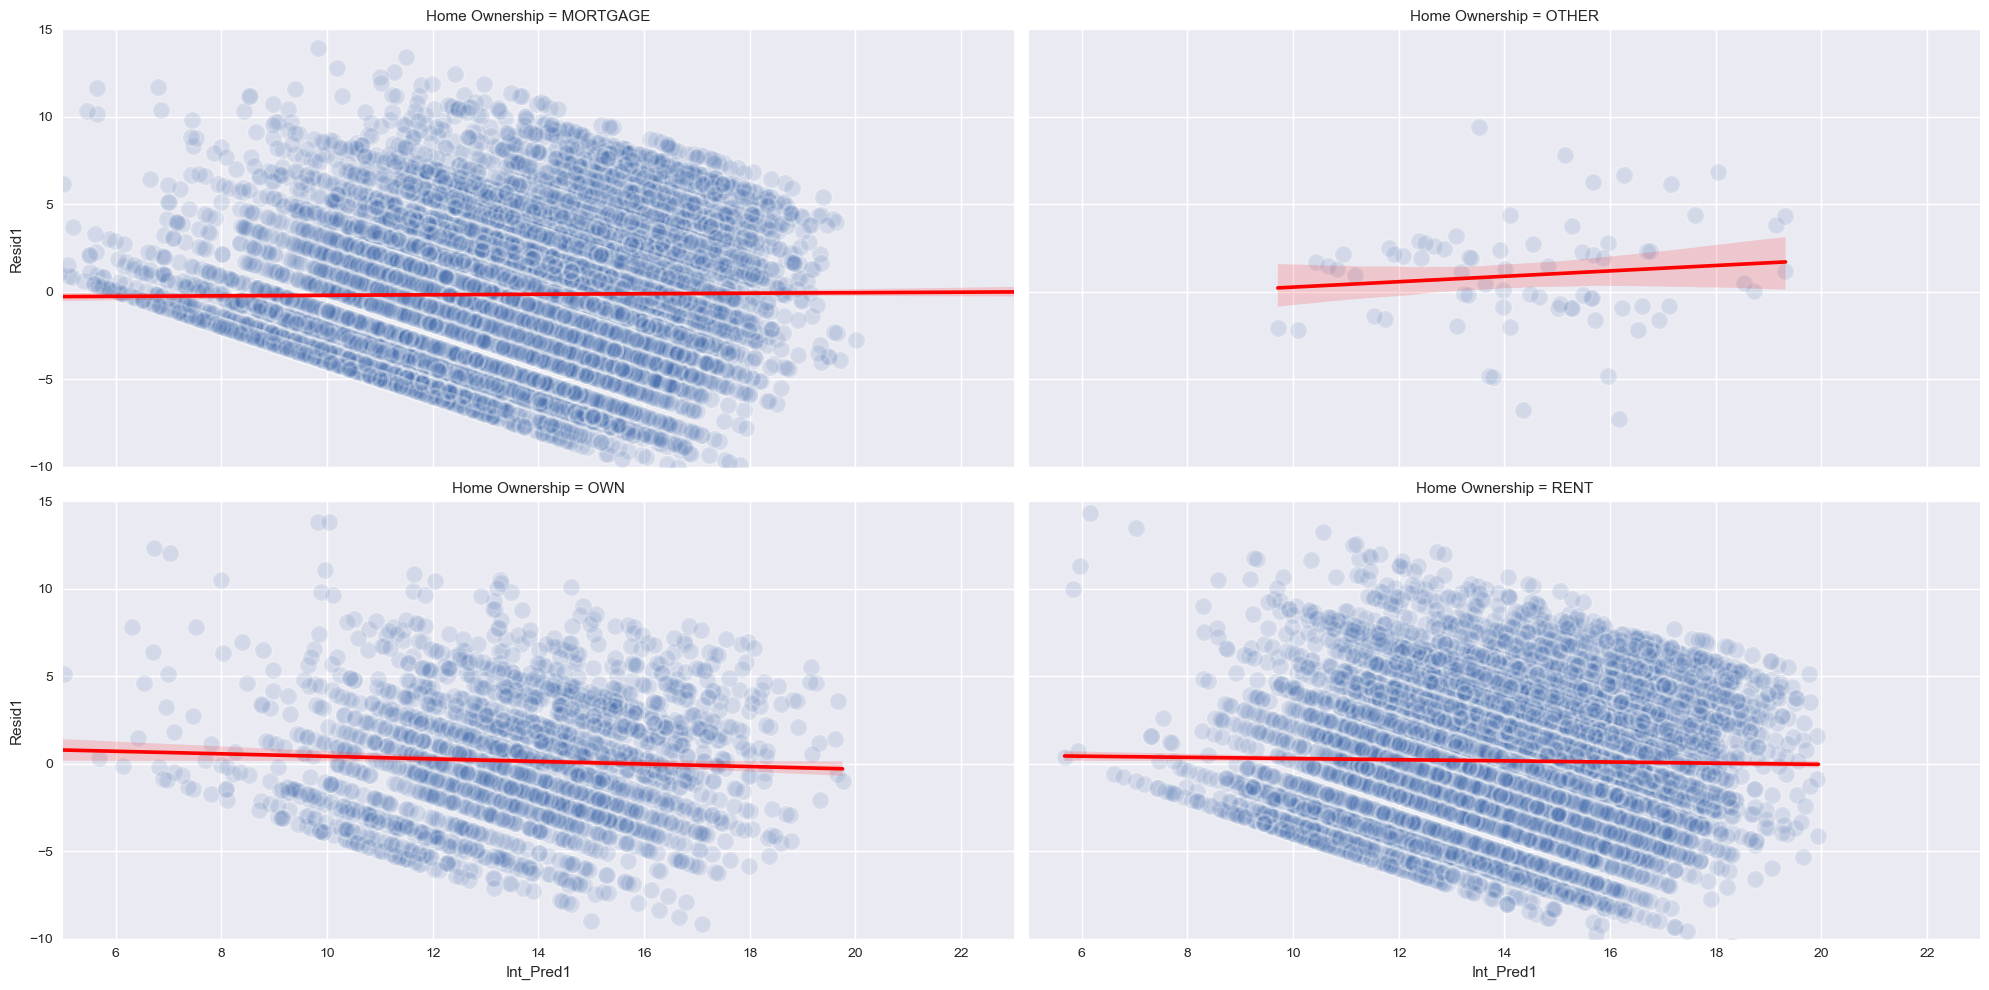

In [92]:
#Code Block 33
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.lmplot(x='Int_Pred1', y='Resid1', col="Home Ownership", col_wrap=2, data = df_reg_results, palette="Set1", 
           aspect = 2, scatter_kws={"alpha":0.15,"s":150,"linewidths":2,"edgecolor":"white"}, line_kws={'color': 'red'})
plt.xlim(5, 23)
plt.ylim(-10, 15)

<h2 style="color:blue;">C1.S8.Py04 - Calculating VIF for features to test multi-colinearity</h2>

### What is VIF?



The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

### How to calculate VIF
- Run a multiple regression for each feature in the X dataset. (for example, if X has 6 features [x1, x2, x3, x4, x5, and x6], then run six models where each feature is the target variable, such as x1 ~ x2 + x3 + x4 + x5 + x6.  

**Steps for Implementing VIF**
- Run a multiple regression.
- Calculate the VIF factors.
    - Run a multiple regression for each feature in the X dataset. (for example, if X has 6 features [x1, x2, x3, x4, x5, and x6], then run six models where each feature is the target variable, such as x1 ~ x2 + x3 + x4 + x5 + x6.  
    - Calculate VIF: 1 / (1 - R^2)
- Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

https://etav.github.io/python/vif_factor_python.html

In [94]:
#Code Block 34
df.head()

Member ID  Loan ID Origination Date  Interest Rate  Amount Funded  \
6     735990   789789          2/17/19           7.62           7500   
8     778284   746115         12/13/18           6.03          10000   
4     603349   885844         11/17/19          16.29          15000   
7     771211   888522         11/20/19          21.49          35000   
9     780866   812348          4/24/19          11.14           3600   

   Total Debt  Annual Income  Revolving Accounts  Total Revolving Credit Line  \
6    265809.0          92000              6419.0                      43000.0   
8    152402.0         108000              4653.0                      46100.0   
4    227890.0          72000             11702.0                      26300.0   
7    354982.0         114000             38651.0                      79800.0   
9    175788.0          65000             12936.0                      39400.0   

   Term Grade               Employee Title  Length of Employment  \
6    36     A                      TD Bank                   4.0   
8    36     A            FlightStats, Inc.                   1.0   
4    36     C                          NaN                   NaN   
7    60     E  Nevada Gaming Control Board                   7.0   
9    36     B               City of Ithaca                   3.0   

  Home Ownership Income Verification      Loan Purpose Zip Code of Residence  \
6       MORTGAGE                 NaN       credit_card                 030xx   
8       MORTGAGE                 NaN  home_improvement                 750xx   
4       MORTGAGE            Verified             house                 341xx   
7       MORTGAGE            Verified       credit_card                 891xx   
9       MORTGAGE                 NaN               car                 488xx   

  State of Residence  Delinquencies Past 24 Months  \
6                 NH                           NaN   
8                 TX                           NaN   
4                 FL                           NaN   
7                 NV                           1.0   
9                 MI                           NaN   

   Credit Inquires Last 6 Months  Open Accounts  TermNum TermString  Day  \
6                              2              5       37  36 months    6   
8                              0             10       37  36 months    3   
4                              1             18       37  36 months    6   
7                              1             19       61  60 months    2   
9                              0             22       37  36 months    2   

   Month  Year  Loan_Income  Debt_Income  RevBal_Line  RevBal_Income  
6      2  2019     0.081522     2.889228     0.149279       0.069772  
8     12  2018     0.092593     1.411130     0.100933       0.043083  
4     11  2019     0.208333     3.165139     0.444943       0.162528  
7     11  2019     0.307018     3.113877     0.484348       0.339044  
9      4  2019     0.055385     2.704431     0.328325       0.199015

In [96]:
#Code Block 35
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
#Code Block 36
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   const                        30071 non-null  float64
 1   Amount Funded                30071 non-null  int64  
 2   Total Debt                   30071 non-null  float64
 3   Annual Income                30071 non-null  int64  
 4   Revolving Accounts           30071 non-null  float64
 5   Total Revolving Credit Line  30071 non-null  float64
 6   Loan_Income                  30071 non-null  float64
 7   Debt_Income                  30071 non-null  float64
 8   RevBal_Line                  30071 non-null  float64
 9   RevBal_Income                30071 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 2.5 MB


In [100]:
#Code Block 37
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

VIF Factor                     features
0        22.1                        const
4         7.5           Revolving Accounts
5         7.2  Total Revolving Credit Line
2         5.0                   Total Debt
7         3.3                  Debt_Income
9         3.1                RevBal_Income
1         2.9                Amount Funded
6         2.8                  Loan_Income
8         2.2                  RevBal_Line
3         1.6                Annual Income

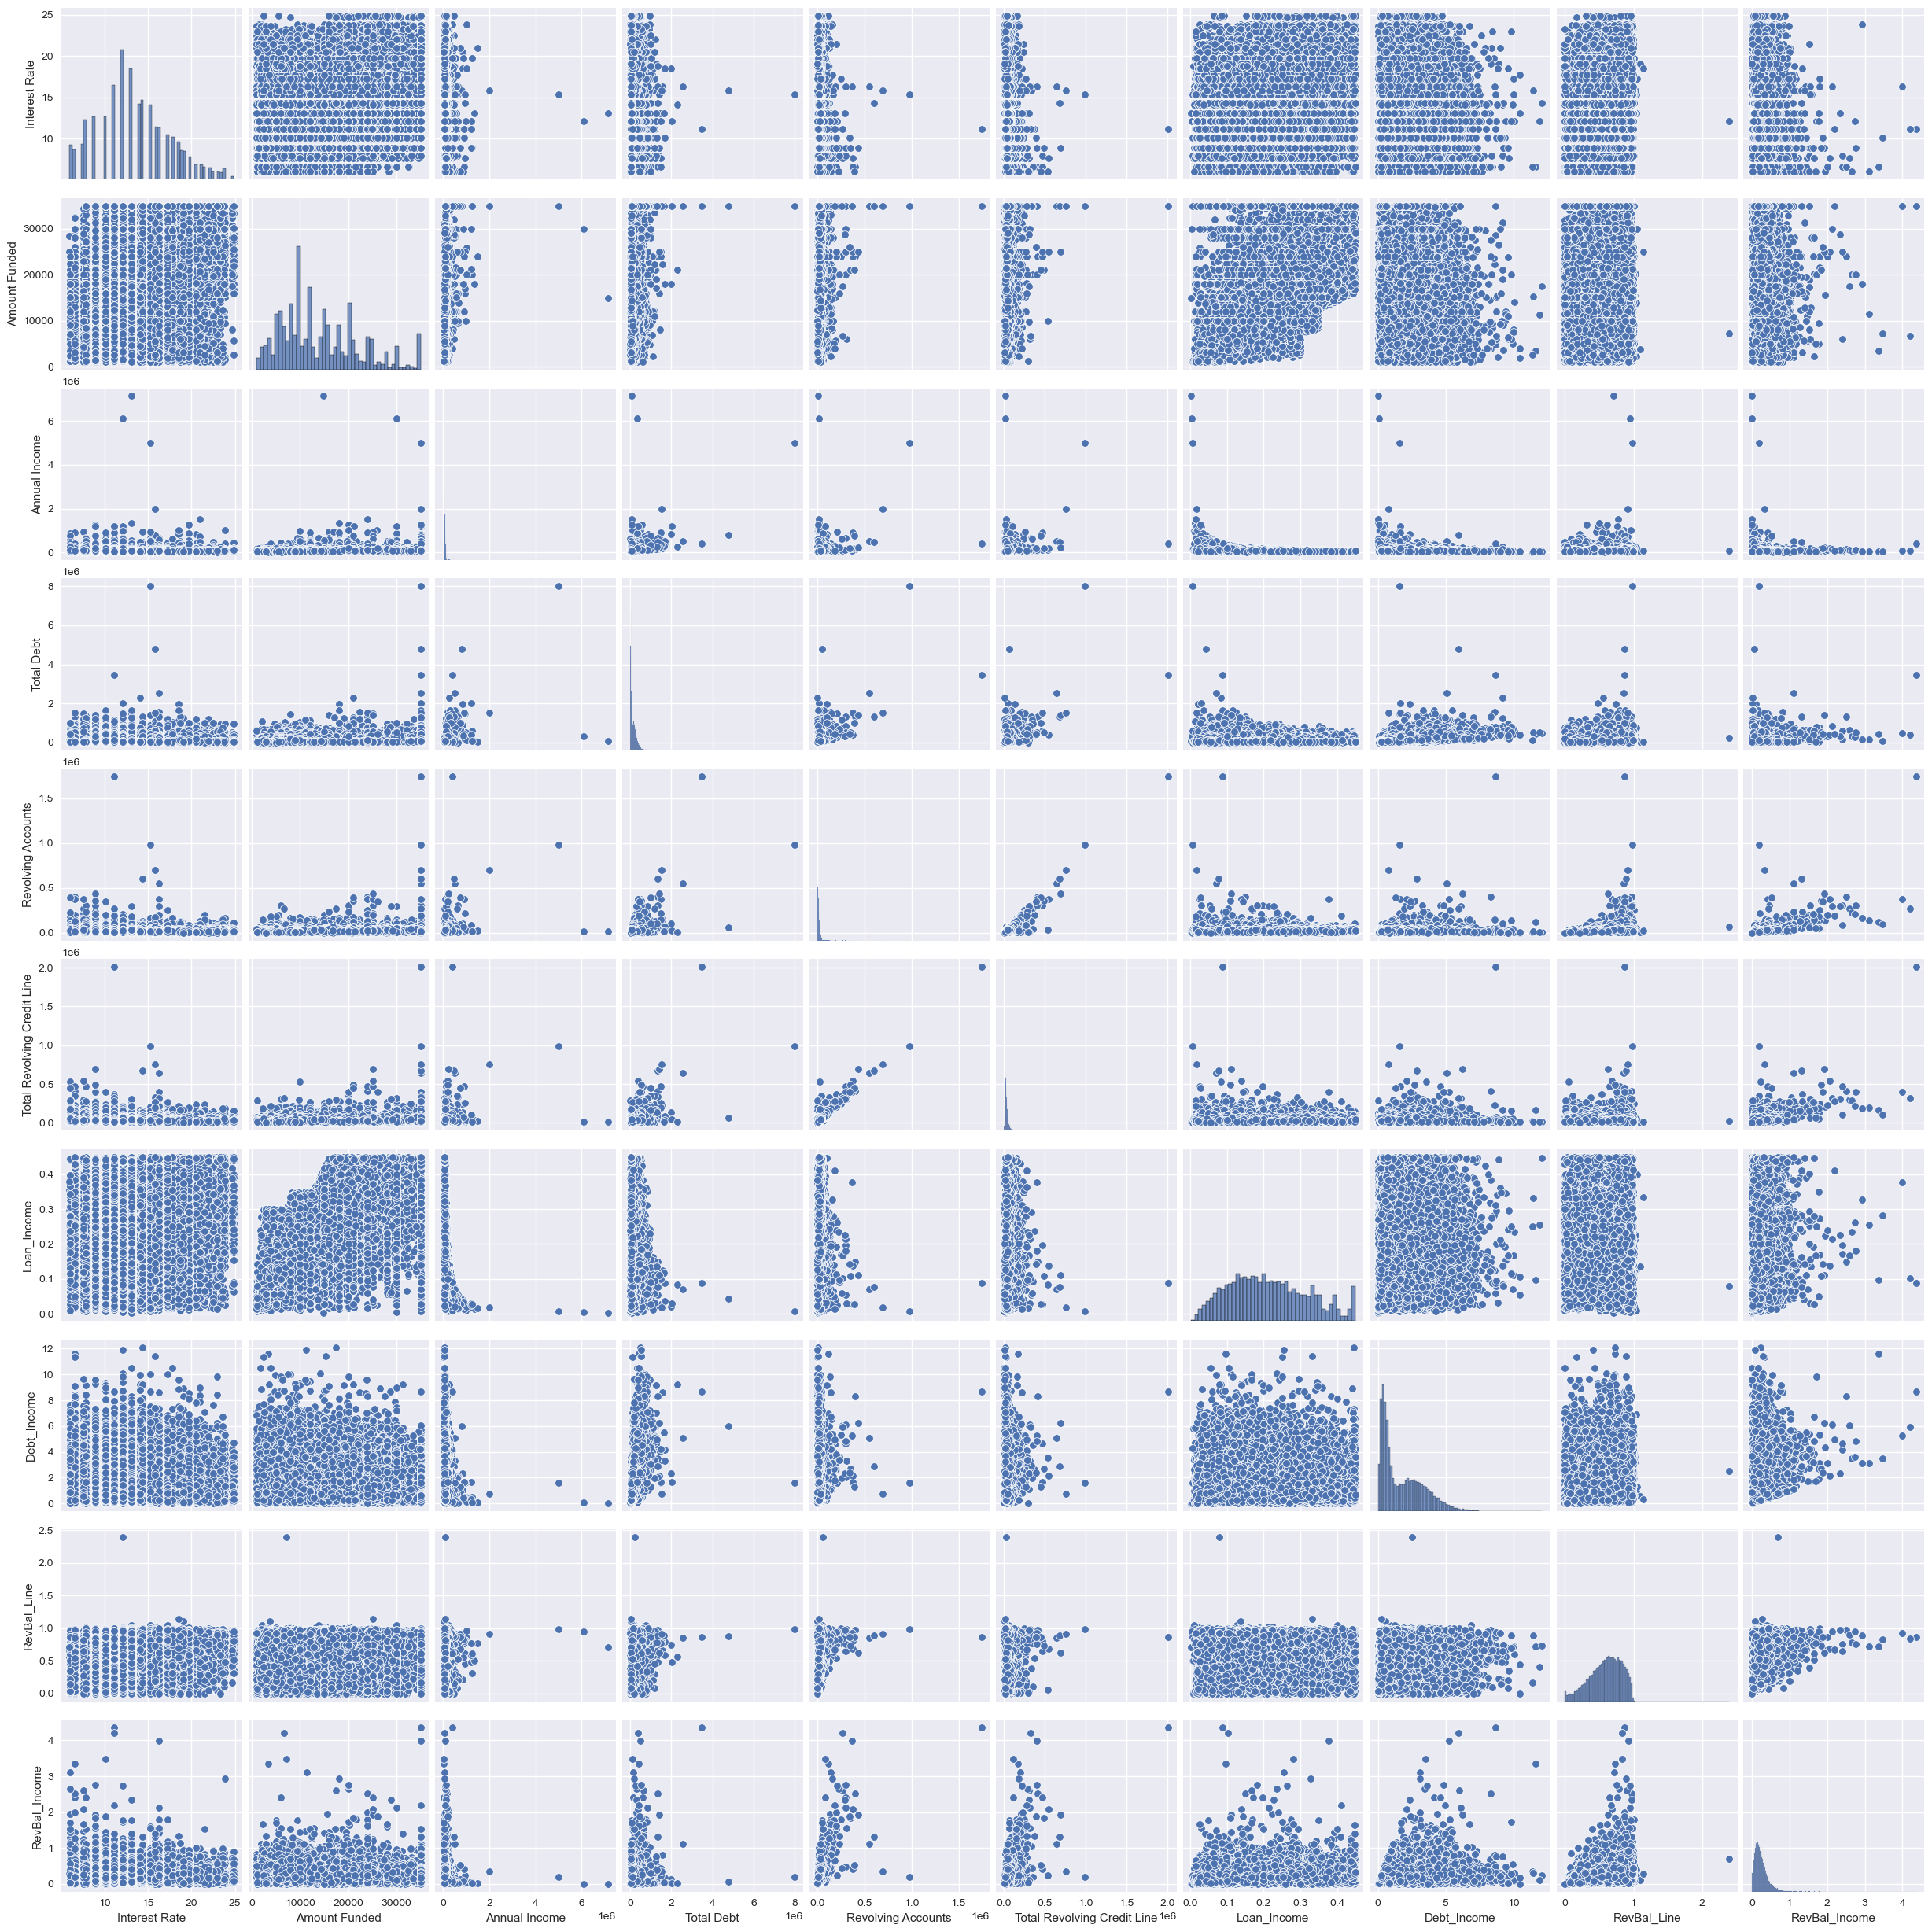

In [102]:
#Code Block 38
sns.pairplot(df_reg)

In [103]:
#Code Block 39
corrMatrix = df_reg.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
df_corrMatrix

Interest Rate  Amount Funded  Annual Income  \
Interest Rate                     1.000000       0.242464      -0.024561   
Amount Funded                     0.242464       1.000000       0.256650   
Annual Income                    -0.024561       0.256650       1.000000   
Total Debt                       -0.095138       0.298108       0.416932   
Revolving Accounts                0.006394       0.304476       0.311353   
Total Revolving Credit Line      -0.173187       0.324701       0.285382   
Loan_Income                       0.279482       0.585611      -0.207016   
Debt_Income                      -0.099984       0.115527       0.040413   
RevBal_Line                       0.402852       0.104256       0.040163   
RevBal_Income                     0.054865       0.125522      -0.099738   

                             Total Debt  Revolving Accounts  \
Interest Rate                 -0.095138            0.006394   
Amount Funded                  0.298108            0.304476   
Annual Income                  0.416932            0.311353   
Total Debt                     1.000000            0.456510   
Revolving Accounts             0.456510            1.000000   
Total Revolving Credit Line    0.428782            0.847692   
Loan_Income                   -0.162713            0.032306   
Debt_Income                    0.732395            0.171710   
RevBal_Line                    0.071141            0.240771   
RevBal_Income                  0.056626            0.618817   

                             Total Revolving Credit Line  Loan_Income  \
Interest Rate                                  -0.173187     0.279482   
Amount Funded                                   0.324701     0.585611   
Annual Income                                   0.285382    -0.207016   
Total Debt                                      0.428782    -0.162713   
Revolving Accounts                              0.847692     0.032306   
Total Revolving Credit Line                     1.000000     0.030863   
Loan_Income                                     0.030863     1.000000   
Debt_Income                                     0.173927    -0.013201   
RevBal_Line                                    -0.134518     0.072475   
RevBal_Income                                   0.519010     0.325588   

                             Debt_Income  RevBal_Line  RevBal_Income  
Interest Rate                  -0.099984     0.402852       0.054865  
Amount Funded                   0.115527     0.104256       0.125522  
Annual Income                   0.040413     0.040163      -0.099738  
Total Debt                      0.732395     0.071141       0.056626  
Revolving Accounts              0.171710     0.240771       0.618817  
Total Revolving Credit Line     0.173927    -0.134518       0.519010  
Loan_Income                    -0.013201     0.072475       0.325588  
Debt_Income                     1.000000     0.052414       0.136940  
RevBal_Line                     0.052414     1.000000       0.322219  
RevBal_Income                   0.136940     0.322219       1.000000

<Axes: >

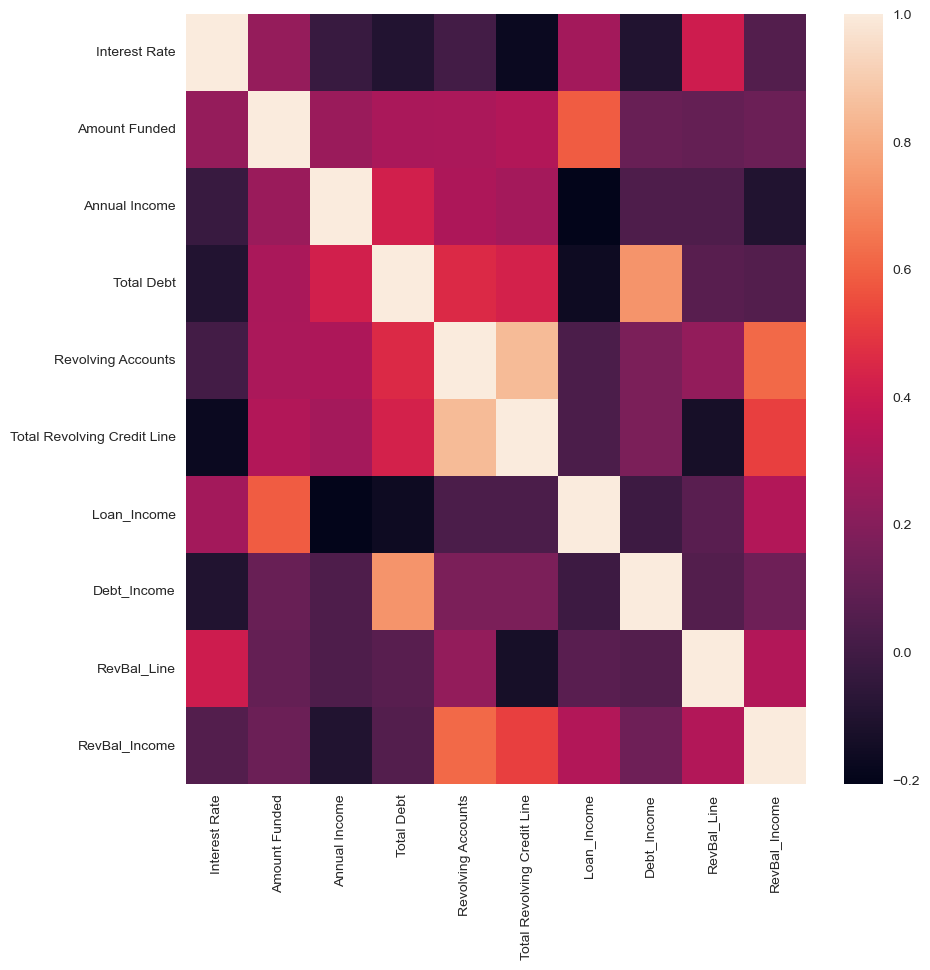

In [106]:
#Code Block 40
plt.figure(figsize=(10,10))
sns.heatmap(df_corrMatrix)

<Axes: title={'center': 'Pearson Correlation of Features'}>

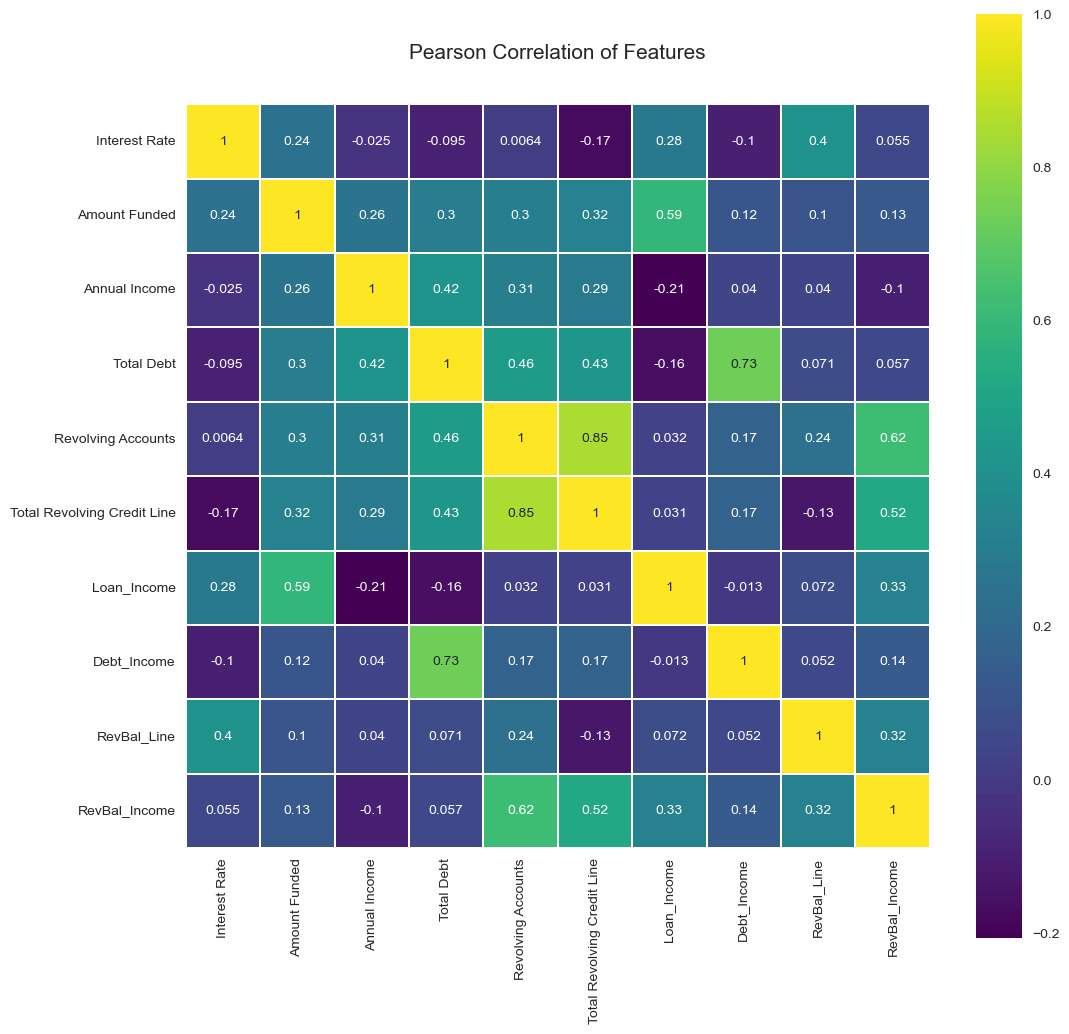

In [108]:
#Code Block 41
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

<h2 style="color:blue;">C1.S8.Py05 - Re-run a multiple regression becuase of multi-colinearity</h2>

- Remove either ['Revolving Accounts'] or  ['Total Revolving Credit Line'] and see if it makes a difference.

In [110]:
#Code Block 42
X = df[['Amount Funded', 'Annual Income', 'Total Debt', 'Revolving Accounts', 'Total Revolving Credit Line', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income']]
y = df[['Interest Rate']]

In [112]:
#Code Block 43
X = sm.add_constant(X) # adding a constant

reg1 = sm.OLS(y, X).fit()

predictions1 = reg1.predict(X) 
resid1 = reg1.resid
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     1288.
Date:                Sat, 21 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:09:16   Log-Likelihood:                -80773.
No. Observations:               30071   AIC:                         1.616e+05
Df Residuals:                   30061   BIC:                         1.616e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           9.0295      0.096     93.787      0.000       8.841       9.218
Amount Funded                8.778e-05    4.3e-06     20.413      0.000    7.94e-05    9.62e-05
Annual Income                -8.13e-07   3.24e-07     -2.513      0.012   -1.45e-06   -1.79e-07
Total Debt                  -1.616e-06   2.86e-07     -5.654      0.000   -2.18e-06   -1.06e-06
Revolving Accounts           4.085e-05   2.65e-06     15.389      0.000    3.56e-05    4.61e-05
Total Revolving Credit Line -3.659e-05   1.83e-06    -19.961      0.000   -4.02e-05    -3.3e-05
Loan_Income                     7.0752      0.322     21.974      0.000       6.444       7.706
Debt_Income                    -0.1682      0.024     -7.040      0.000      -0.215      -0.121
RevBal_Line                     6.0316      0.133     45.243      0.000       5.770       6.293
RevBal_Income                  -2.5013      0.193    -12.954      0.000      -2.880      -2.123
==============================================================================
Omnibus:                      432.419   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.472
Skew:                           0.285   Prob(JB):                     1.37e-96
Kurtosis:                       2.835   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
#Code Block 44
X = df[['Amount Funded', 'Annual Income', 'Total Debt', 'Total Revolving Credit Line', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income']]

In [116]:
#Code Block 45
X = sm.add_constant(X) # adding a constant

reg1 = sm.OLS(y, X).fit()

predictions1 = reg1.predict(X) 
resid1 = reg1.resid
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1408.
Date:                Sat, 21 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:09:17   Log-Likelihood:                -80891.
No. Observations:               30071   AIC:                         1.618e+05
Df Residuals:                   30062   BIC:                         1.619e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           8.2958      0.084     98.795      0.000       8.131       8.460
Amount Funded                8.309e-05   4.31e-06     19.295      0.000    7.46e-05    9.15e-05
Annual Income               -4.977e-07   3.24e-07     -1.535      0.125   -1.13e-06    1.38e-07
Total Debt                  -4.171e-07   2.76e-07     -1.511      0.131   -9.58e-07    1.24e-07
Total Revolving Credit Line -1.543e-05   1.22e-06    -12.679      0.000   -1.78e-05    -1.3e-05
Loan_Income                     7.1021      0.323     21.972      0.000       6.469       7.736
Debt_Income                    -0.2534      0.023    -10.856      0.000      -0.299      -0.208
RevBal_Line                     7.0962      0.114     62.027      0.000       6.872       7.320
RevBal_Income                  -1.7715      0.188     -9.427      0.000      -2.140      -1.403
==============================================================================
Omnibus:                      537.444   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.128
Skew:                           0.329   Prob(JB):                    7.07e-124
Kurtosis:                       3.141   Cond. No.                     3.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
#Code Block 46
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

VIF Factor                     features
0        16.7                        const
3         4.7                   Total Debt
4         3.2  Total Revolving Credit Line
6         3.1                  Debt_Income
8         2.9                RevBal_Income
1         2.8                Amount Funded
5         2.8                  Loan_Income
2         1.6                Annual Income
7         1.6                  RevBal_Line

In [120]:
#Code Block 47

corrMatrix = X[['Amount Funded', 'Annual Income', 'Total Debt', 'Total Revolving Credit Line', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income']].corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)

Amount Funded  Annual Income  Total Debt  \
Amount Funded                        1.000          0.257       0.298   
Annual Income                        0.257          1.000       0.417   
Total Debt                           0.298          0.417       1.000   
Total Revolving Credit Line          0.325          0.285       0.429   
Loan_Income                          0.586         -0.207      -0.163   
Debt_Income                          0.116          0.040       0.732   
RevBal_Line                          0.104          0.040       0.071   
RevBal_Income                        0.126         -0.100       0.057   

                             Total Revolving Credit Line  Loan_Income  \
Amount Funded                                      0.325        0.586   
Annual Income                                      0.285       -0.207   
Total Debt                                         0.429       -0.163   
Total Revolving Credit Line                        1.000        0.031   
Loan_Income                                        0.031        1.000   
Debt_Income                                        0.174       -0.013   
RevBal_Line                                       -0.135        0.072   
RevBal_Income                                      0.519        0.326   

                             Debt_Income  RevBal_Line  RevBal_Income  
Amount Funded                      0.116        0.104          0.126  
Annual Income                      0.040        0.040         -0.100  
Total Debt                         0.732        0.071          0.057  
Total Revolving Credit Line        0.174       -0.135          0.519  
Loan_Income                       -0.013        0.072          0.326  
Debt_Income                        1.000        0.052          0.137  
RevBal_Line                        0.052        1.000          0.322  
RevBal_Income                      0.137        0.322          1.000

<Axes: title={'center': 'Pearson Correlation of Features'}>

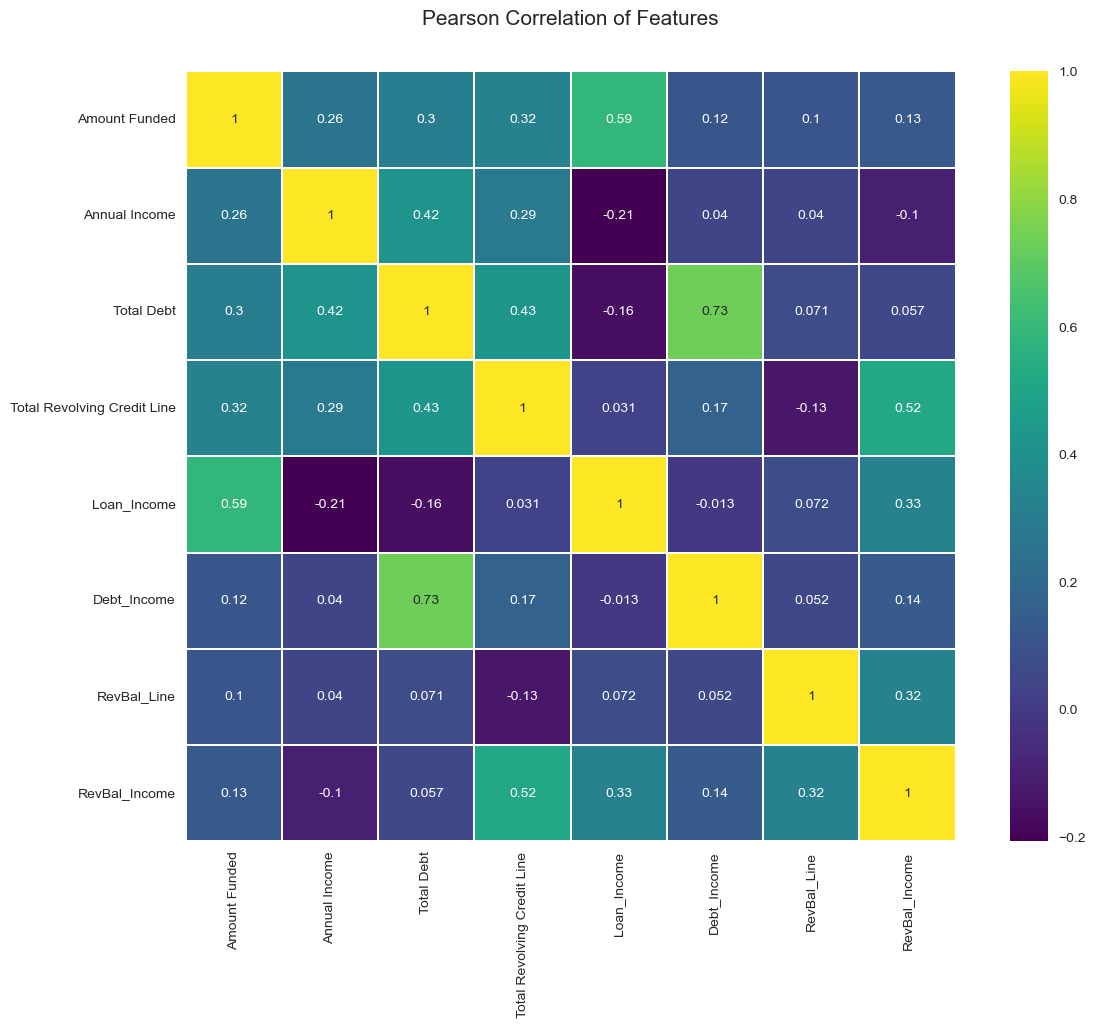

In [122]:
#Code Block 48
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)